In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.impute import SimpleImputer

2023-06-19 20:42:32.150464: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = '/lustre/storeB/project/IT/geout/machine-ocean/data_raw/metop/'

In [4]:
with open(data_dir + 'collocated_dict_ascat_9000_images_era5_cnn_7_7.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

CE        CN          IR           Lv          P10         Pair  \
0    -0.014471 -0.120929  362.121919  2445.131856  1022.891239  1024.060199   
1    -0.037062 -0.060154  409.239282  2444.968851  1022.957700  1024.125722   
2     0.043799 -0.270238  363.438272  2444.951085  1021.556901  1022.724500   
3     0.041605 -0.260111  370.811817  2444.810308  1021.281465  1022.448420   
4     0.097729 -0.181983  361.009196  2444.965684  1021.997106  1023.165355   
...        ...       ...         ...          ...          ...          ...   
7397 -0.120886 -0.205319  330.230000  2481.329336  1015.473704  1016.707986   
7398 -0.135043 -0.212356  325.810001  2482.154959  1016.258730  1017.502997   
7399 -0.184694 -0.085406  326.299998  2482.132121  1016.589339  1017.833002   
7400 -0.000651 -0.231066  212.345000  2482.411651  1030.922939  1032.223492   
7401  0.008426 -0.310981  211.225002  2482.706724  1031.119745  1032.420013   

            Q10       Qair         RH       RH10  ...  v10_39  v10_40  v10_41  \
0     12.833504  13.200377  76.160202  74.471500  ...    -1.0    -1.0    -1.0   
1     13.042352  13.404786  76.311600  74.620695  ...    -1.0    -1.0    -1.0   
2     12.463280  12.850843  73.969745  72.166180  ...    -3.0    -3.0    -4.0   
3     12.624378  13.010786  74.614907  72.834694  ...    -4.0    -4.0    -4.0   
4     12.350651  12.727492  73.363599  71.608672  ...    -3.0    -3.0    -3.0   
...         ...        ...        ...        ...  ...     ...     ...     ...   
7397   5.542659   5.581667  90.589849  90.521463  ...     0.0    -1.0    -1.0   
7398   4.446443   4.498458  83.074749  82.783827  ...    -5.0    -5.0    -5.0   
7399   4.451336   4.505584  81.943449  81.599753  ...    -4.0    -4.0    -5.0   
7400   1.852644   2.094365  68.787000  65.156515  ...   -13.0   -13.0   -13.0   
7401   1.835298   2.065306  67.269700  63.782608  ...   -12.0   -12.0   -12.0   

      v10_42  v10_43  v10_44  v10_45  v10_46  v10_47  v10_48  
0       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
1       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
2       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
3       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
4       -3.0    -3.0    -3.0    -3.0    -3.0    -3.0    -3.0  
...      ...     ...     ...     ...     ...     ...     ...  
7397    -4.0    -4.0    -3.0    -3.0    -3.0    -4.0    -4.0  
7398    -4.0    -4.0    -5.0    -5.0    -5.0    -6.0    -6.0  
7399    -3.0    -4.0    -4.0    -4.0    -5.0    -5.0    -5.0  
7400   -11.0   -12.0   -12.0   -13.0   -13.0   -13.0   -14.0  
7401   -10.0   -11.0   -11.0   -12.0   -12.0   -12.0   -13.0  

[7402 rows x 789 columns]

In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

CE        CN          IR           Lv          P10         Pair  \
0    -0.014471 -0.120929  362.121919  2445.131856  1022.891239  1024.060199   
1    -0.037062 -0.060154  409.239282  2444.968851  1022.957700  1024.125722   
2     0.043799 -0.270238  363.438272  2444.951085  1021.556901  1022.724500   
3     0.041605 -0.260111  370.811817  2444.810308  1021.281465  1022.448420   
4     0.097729 -0.181983  361.009196  2444.965684  1021.997106  1023.165355   
...        ...       ...         ...          ...          ...          ...   
7397 -0.120886 -0.205319  330.230000  2481.329336  1015.473704  1016.707986   
7398 -0.135043 -0.212356  325.810001  2482.154959  1016.258730  1017.502997   
7399 -0.184694 -0.085406  326.299998  2482.132121  1016.589339  1017.833002   
7400 -0.000651 -0.231066  212.345000  2482.411651  1030.922939  1032.223492   
7401  0.008426 -0.310981  211.225002  2482.706724  1031.119745  1032.420013   

            Q10       Qair         RH       RH10  ...  v10_39  v10_40  v10_41  \
0     12.833504  13.200377  76.160202  74.471500  ...    -1.0    -1.0    -1.0   
1     13.042352  13.404786  76.311600  74.620695  ...    -1.0    -1.0    -1.0   
2     12.463280  12.850843  73.969745  72.166180  ...    -3.0    -3.0    -4.0   
3     12.624378  13.010786  74.614907  72.834694  ...    -4.0    -4.0    -4.0   
4     12.350651  12.727492  73.363599  71.608672  ...    -3.0    -3.0    -3.0   
...         ...        ...        ...        ...  ...     ...     ...     ...   
7397   5.542659   5.581667  90.589849  90.521463  ...     0.0    -1.0    -1.0   
7398   4.446443   4.498458  83.074749  82.783827  ...    -5.0    -5.0    -5.0   
7399   4.451336   4.505584  81.943449  81.599753  ...    -4.0    -4.0    -5.0   
7400   1.852644   2.094365  68.787000  65.156515  ...   -13.0   -13.0   -13.0   
7401   1.835298   2.065306  67.269700  63.782608  ...   -12.0   -12.0   -12.0   

      v10_42  v10_43  v10_44  v10_45  v10_46  v10_47  v10_48  
0       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
1       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
2       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
3       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
4       -3.0    -3.0    -3.0    -3.0    -3.0    -3.0    -3.0  
...      ...     ...     ...     ...     ...     ...     ...  
7397    -4.0    -4.0    -3.0    -3.0    -3.0    -4.0    -4.0  
7398    -4.0    -4.0    -5.0    -5.0    -5.0    -6.0    -6.0  
7399    -3.0    -4.0    -4.0    -4.0    -5.0    -5.0    -5.0  
7400   -11.0   -12.0   -12.0   -13.0   -13.0   -13.0   -14.0  
7401   -10.0   -11.0   -11.0   -12.0   -12.0   -12.0   -13.0  

[7402 rows x 789 columns]

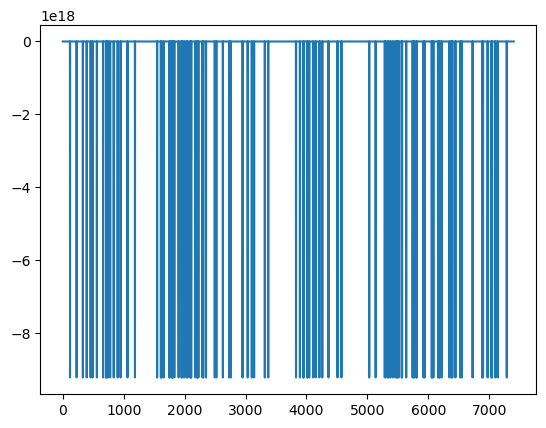

In [7]:
plt.plot(df['sigma0_trip_fore_30'])

In [8]:
df = df.replace(-9.223372036854776e+18, np.nan)
df = df.replace(-2147.0, np.nan)



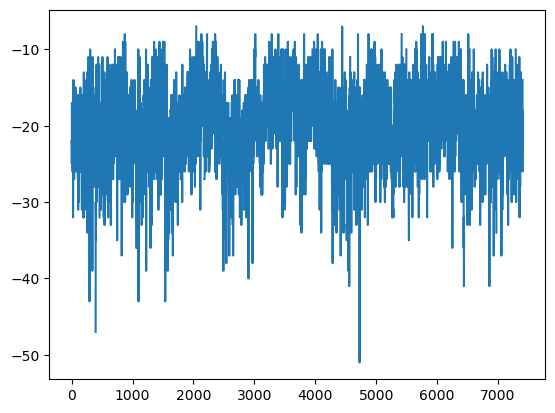

In [9]:
plt.plot(df['sigma0_trip_fore_30'])

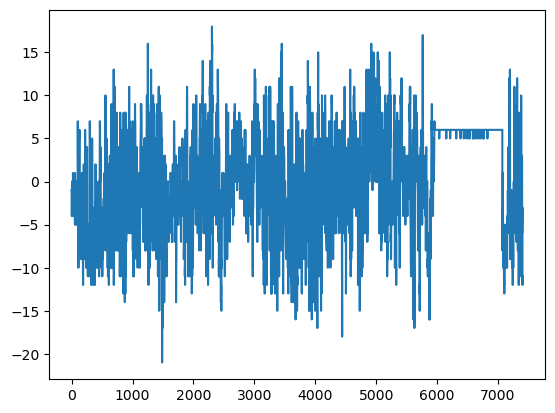

In [16]:
plt.plot(df['v10_30'])

In [18]:
nx=7#17
ny=7#17

In [19]:
num_pixels = nx*ny

In [20]:
list_num_pixels = list(range(num_pixels))

list_of_params_extended = [
        'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
        'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
        'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
        #'start_sensing_time','stop_sensing_time',
        'lats_cropped_image', 'lons_cropped_image',
        'u10', 'v10'
    ]

dict_of_column_names = {}
new_columns = []
for param in list_of_params_extended:
    columns = [param + '_' + str(n) for n in list_num_pixels]
    dict_of_column_names[param] = columns
    new_columns = new_columns + columns
    
predictor_variables = new_columns

In [21]:
sigma0_vars = dict_of_column_names['sigma0_trip_fore'] + dict_of_column_names['sigma0_trip_mid'] + dict_of_column_names['sigma0_trip_aft']

In [22]:
df = df.dropna(subset=['UWr', 'rhoair'] + sigma0_vars)
df

CE        CN          IR           Lv          P10         Pair  \
0    -0.014471 -0.120929  362.121919  2445.131856  1022.891239  1024.060199   
1    -0.037062 -0.060154  409.239282  2444.968851  1022.957700  1024.125722   
2     0.043799 -0.270238  363.438272  2444.951085  1021.556901  1022.724500   
3     0.041605 -0.260111  370.811817  2444.810308  1021.281465  1022.448420   
6     0.016060 -0.188835  364.891042  2443.960198  1022.073325  1023.240020   
...        ...       ...         ...          ...          ...          ...   
7387 -0.030999 -0.055034  301.905005  2483.266861  1028.338851  1029.626501   
7388 -0.065856 -0.139462  301.880002  2483.165844  1028.308209  1029.595007   
7389 -0.065835 -0.202534  302.735001  2483.109734  1026.631289  1027.916498   
7392 -0.219808  0.016286  263.200002  2481.270003  1016.120909  1017.365500   
7393 -0.239717 -0.006338  268.825002  2481.378877  1016.677804  1017.923492   

            Q10       Qair         RH       RH10  ...  v10_39  v10_40  v10_41  \
0     12.833504  13.200377  76.160202  74.471500  ...    -1.0    -1.0    -1.0   
1     13.042352  13.404786  76.311600  74.620695  ...    -1.0    -1.0    -1.0   
2     12.463280  12.850843  73.969745  72.166180  ...    -3.0    -3.0    -4.0   
3     12.624378  13.010786  74.614907  72.834694  ...    -4.0    -4.0    -4.0   
6     12.478202  12.768838  71.809918  70.533515  ...     0.0     0.0     0.0   
...         ...        ...        ...        ...  ...     ...     ...     ...   
7387   2.545638   2.643711  75.128500  73.550027  ...    -5.0    -5.0    -5.0   
7388   2.537448   2.641438  74.126949  72.500254  ...    -5.0    -5.0    -5.0   
7389   2.634754   2.740547  77.475850  75.857943  ...    -5.0    -6.0    -6.0   
7392   3.401803   3.546097  65.284349  63.452167  ...     2.0     2.0     2.0   
7393   3.516586   3.657705  67.896750  66.168142  ...     2.0     2.0     2.0   

      v10_42  v10_43  v10_44  v10_45  v10_46  v10_47  v10_48  
0       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
1       -1.0    -1.0    -1.0    -1.0    -1.0    -1.0    -1.0  
2       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
3       -4.0    -4.0    -4.0    -4.0    -4.0    -4.0    -4.0  
6        0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...      ...     ...     ...     ...     ...     ...     ...  
7387    -5.0    -5.0    -5.0    -5.0    -5.0    -5.0    -5.0  
7388    -5.0    -5.0    -5.0    -5.0    -5.0    -5.0    -5.0  
7389    -5.0    -5.0    -5.0    -5.0    -5.0    -6.0    -6.0  
7392     1.0     1.0     1.0     2.0     2.0     2.0     2.0  
7393     1.0     1.0     1.0     2.0     2.0     2.0     2.0  

[4971 rows x 789 columns]

In [23]:
df = df.sample(frac = 1, random_state=77)
df     

CE        CN          IR           Lv          P10         Pair  \
3029 -0.354539  0.242567  337.219998  2486.020664  1003.491277  1004.722995   
6277 -0.012150 -0.032903  253.114998  2492.102466   992.582723   993.817496   
6965 -0.012150 -0.032903  323.215001  2482.286529  1002.302247  1003.527499   
4613 -0.249331  0.153261  313.384996  2469.370273  1005.576910  1006.766995   
6554 -0.012150 -0.032903  329.065007  2491.174177  1024.446361  1025.710004   
...        ...       ...         ...          ...          ...          ...   
2022  0.009946 -0.040725  336.980000  2483.605896  1013.458022  1014.697501   
3422  0.092275  0.431325  324.430000  2483.406316  1014.005881  1015.247498   
3065 -0.024962  0.615794  328.259999  2484.253150  1010.407872  1011.637506   
5441 -0.012150 -0.032903  241.499999  2482.534901  1014.345970  1015.590503   
907  -0.087821 -0.252813  263.175000  2486.495918  1011.060544  1012.291006   

           Q10      Qair         RH       RH10  ...  v10_39  v10_40  v10_41  \
3029  4.489691  4.536951  84.943491  84.577420  ...     9.0     9.0     9.0   
6277  3.110535  3.175436  74.586103  73.680301  ...     4.0     2.0     1.0   
6965  5.161624  5.199914  89.723153  89.624287  ...     5.0     5.0     4.0   
4613  8.623616  8.673712  87.090349  86.495358  ...    -1.0    -2.0    -3.0   
6554  4.359873  4.381742  91.141153  91.037993  ...     5.0     4.0     3.0   
...        ...       ...        ...        ...  ...     ...     ...     ...   
2022  5.395798  5.410979  95.481200  95.647664  ...     4.0     4.0     3.0   
3422  4.346709  4.411815  79.523102  78.903415  ...     7.0     7.0     8.0   
3065  5.239515  5.276431  85.010313  84.586659  ...     4.0     3.0     3.0   
5441  2.164184  2.259630  40.983904  39.485767  ...    -3.0    -4.0    -4.0   
907   4.788709  4.874640  80.070300  78.498147  ...    -1.0    -2.0    -2.0   

      v10_42  v10_43  v10_44  v10_45  v10_46  v10_47  v10_48  
3029     9.0     9.0     9.0     9.0     9.0     9.0     9.0  
6277     5.0     5.0     4.0     4.0     3.0     1.0     0.0  
6965     6.0     6.0     5.0     5.0     5.0     5.0     4.0  
4613     0.0     0.0     0.0     0.0    -1.0    -1.0    -2.0  
6554     5.0     5.0     5.0     5.0     4.0     4.0     3.0  
...      ...     ...     ...     ...     ...     ...     ...  
2022     2.0     3.0     3.0     3.0     3.0     3.0     3.0  
3422     6.0     6.0     6.0     7.0     7.0     7.0     7.0  
3065     4.0     4.0     4.0     4.0     4.0     4.0     3.0  
5441     0.0    -1.0    -1.0    -2.0    -3.0    -3.0    -4.0  
907      0.0     0.0     0.0    -1.0    -3.0    -3.0    -4.0  

[4971 rows x 789 columns]

In [24]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

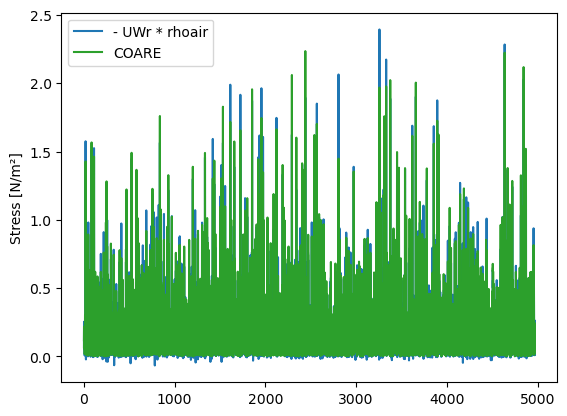

In [25]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [26]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

predictor_variables = ['s0', 'inc', 'az']

In [27]:
df[predictor_variables]

sigma0_trip_fore_0  sigma0_trip_fore_1  sigma0_trip_fore_2  \
3029               -24.0               -23.0               -23.0   
6277               -12.0               -16.0               -17.0   
6965               -26.0               -24.0               -24.0   
4613               -19.0               -24.0               -26.0   
6554               -22.0               -21.0               -20.0   
...                  ...                 ...                 ...   
2022               -23.0               -22.0               -22.0   
3422               -14.0               -14.0               -13.0   
3065               -15.0               -16.0               -16.0   
5441               -22.0               -22.0               -20.0   
907                -22.0               -25.0               -26.0   

      sigma0_trip_fore_3  sigma0_trip_fore_4  sigma0_trip_fore_5  \
3029               -23.0               -22.0               -22.0   
6277               -18.0               -16.0               -15.0   
6965               -23.0               -22.0               -21.0   
4613               -27.0               -28.0               -24.0   
6554               -18.0               -18.0               -18.0   
...                  ...                 ...                 ...   
2022               -21.0               -22.0               -22.0   
3422               -12.0               -12.0               -11.0   
3065               -16.0               -16.0               -17.0   
5441               -17.0               -17.0               -16.0   
907                -26.0               -26.0               -26.0   

      sigma0_trip_fore_6  sigma0_trip_fore_7  sigma0_trip_fore_8  \
3029               -21.0               -23.0               -23.0   
6277               -14.0               -16.0               -16.0   
6965               -20.0               -23.0               -21.0   
4613               -21.0               -24.0               -24.0   
6554               -19.0               -21.0               -20.0   
...                  ...                 ...                 ...   
2022               -23.0               -22.0               -22.0   
3422               -11.0               -14.0               -14.0   
3065               -17.0               -15.0               -15.0   
5441               -16.0               -23.0               -23.0   
907                -33.0               -26.0               -27.0   

      sigma0_trip_fore_9  ...  v10_39  v10_40  v10_41  v10_42  v10_43  v10_44  \
3029               -23.0  ...     9.0     9.0     9.0     9.0     9.0     9.0   
6277               -17.0  ...     4.0     2.0     1.0     5.0     5.0     4.0   
6965               -22.0  ...     5.0     5.0     4.0     6.0     6.0     5.0   
4613               -27.0  ...    -1.0    -2.0    -3.0     0.0     0.0     0.0   
6554               -19.0  ...     5.0     4.0     3.0     5.0     5.0     5.0   
...                  ...  ...     ...     ...     ...     ...     ...     ...   
2022               -22.0  ...     4.0     4.0     3.0     2.0     3.0     3.0   
3422               -13.0  ...     7.0     7.0     8.0     6.0     6.0     6.0   
3065               -16.0  ...     4.0     3.0     3.0     4.0     4.0     4.0   
5441               -21.0  ...    -3.0    -4.0    -4.0     0.0    -1.0    -1.0   
907                -29.0  ...    -1.0    -2.0    -2.0     0.0     0.0     0.0   

      v10_45  v10_46  v10_47  v10_48  
3029     9.0     9.0     9.0     9.0  
6277     4.0     3.0     1.0     0.0  
6965     5.0     5.0     5.0     4.0  
4613     0.0    -1.0    -1.0    -2.0  
6554     5.0     4.0     4.0     3.0  
...      ...     ...     ...     ...  
2022     3.0     3.0     3.0     3.0  
3422     7.0     7.0     7.0     7.0  
3065     4.0     4.0     4.0     3.0  
5441    -2.0    -3.0    -3.0    -4.0  
907     -1.0    -3.0    -3.0    -4.0  

[4971 rows x 637 columns]

In [28]:
imp_mean = SimpleImputer(missing_values=9999, strategy='most_frequent')

In [29]:
x = imp_mean.fit_transform(df[predictor_variables])
x

array([[-24., -23., -23., ...,   9.,   9.,   9.],
       [-12., -16., -17., ...,   3.,   1.,   0.],
       [-26., -24., -24., ...,   5.,   5.,   4.],
       ...,
       [-15., -16., -16., ...,   4.,   4.,   3.],
       [-22., -22., -20., ...,  -3.,  -3.,  -4.],
       [-22., -25., -26., ...,  -3.,  -3.,  -4.]])

In [30]:
x[0, 0]

-24.0

In [31]:
imp_mean = SimpleImputer(missing_values=-9.22337204e+18, strategy='constant')

In [32]:
x = imp_mean.fit_transform(x)
x

array([[-24., -23., -23., ...,   9.,   9.,   9.],
       [-12., -16., -17., ...,   3.,   1.,   0.],
       [-26., -24., -24., ...,   5.,   5.,   4.],
       ...,
       [-15., -16., -16., ...,   4.,   4.,   3.],
       [-22., -22., -20., ...,  -3.,  -3.,  -4.],
       [-22., -25., -26., ...,  -3.,  -3.,  -4.]])

x = df[predictor_variables]
x

In [33]:
x.shape

(4971, 553)

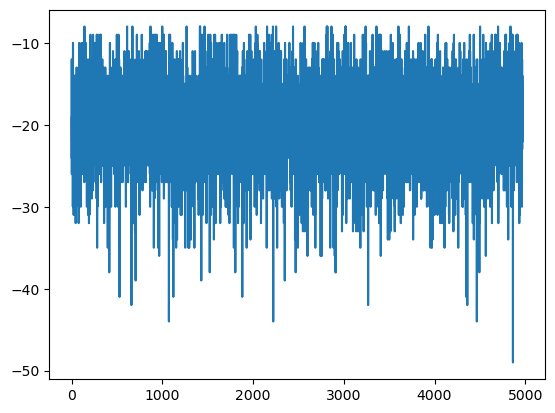

In [34]:
plt.plot(x[:, 0])

In [35]:
y = - df['UWr'] * df['rhoair']
y

3029    0.066925
6277    0.253362
6965    0.052536
4613    0.131716
6554    0.167288
          ...   
2022    0.028674
3422    0.117243
3065    0.263754
5441    0.008997
907     0.025440
Length: 4971, dtype: float64

In [36]:
y.isnull().values.sum()

0

# COARE

In [37]:
c = df['stress']

In [38]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [39]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [40]:
c_train = c[:split_idx]
c_test = c[split_idx:]

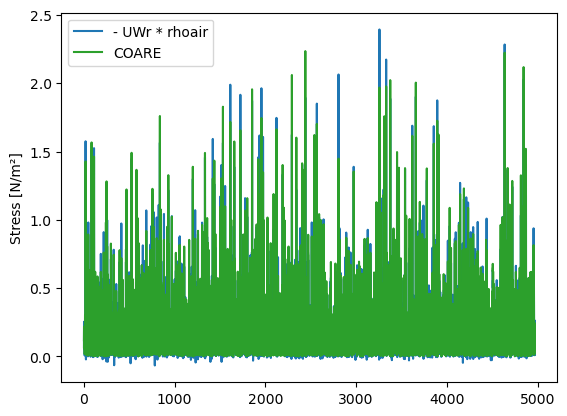

In [41]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [42]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [43]:
OUT_STEPS = 1
num_features = 1
batch_size =32
epochs=500

metric = 'mean_absolute_error'

In [44]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


# First experiment - Linear regression

In [45]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

2023-06-19 20:49:28.116334: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-06-19 20:49:28.116817: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-19 20:49:28.116826: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-19 20:49:28.116843: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c6525-6l5jvp3-bn-compute): /proc/driver/nvidia/version does not exist
2023-06-19 20:49:28.117055: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, 

Epoch 1/500
13/13 [==============================] - 1s 60ms/step - loss: 2.0949 - mean_absolute_error: 1.0457 - val_loss: 0.8986 - val_mean_absolute_error: 0.7311
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 0.8397 - mean_absolute_error: 0.6795 - val_loss: 0.6379 - val_mean_absolute_error: 0.6040
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 0.5510 - mean_absolute_error: 0.5296 - val_loss: 0.5969 - val_mean_absolute_error: 0.5406
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6020 - mean_absolute_error: 0.5198 - val_loss: 0.5543 - val_mean_absolute_error: 0.5277
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6434 - mean_absolute_error: 0.5377 - val_loss: 0.5393 - val_mean_absolute_error: 0.5217
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4644 - mean_absolute_error: 0.4823 - val_loss: 0.5169 - val_mean_absolute_error: 0.5071
Epoch 7/500
13/13 [==

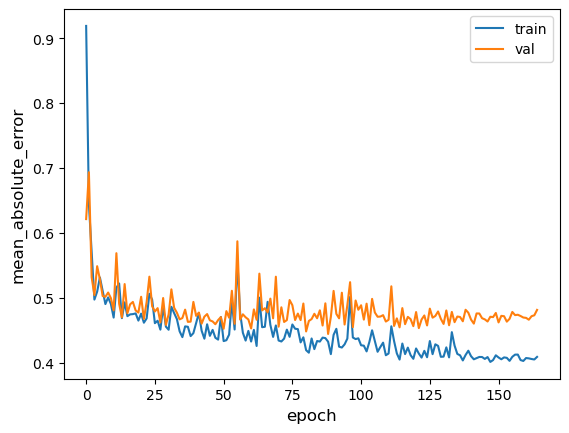

138/138 [==============================] - 0s 396us/step - loss: 0.6496 - mean_absolute_error: 0.5098
Test accuracy 0.5098472833633423
Test loss 0.6496151685714722


In [38]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [39]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

In [40]:
np.mean(y_test)

0.18524895712347336

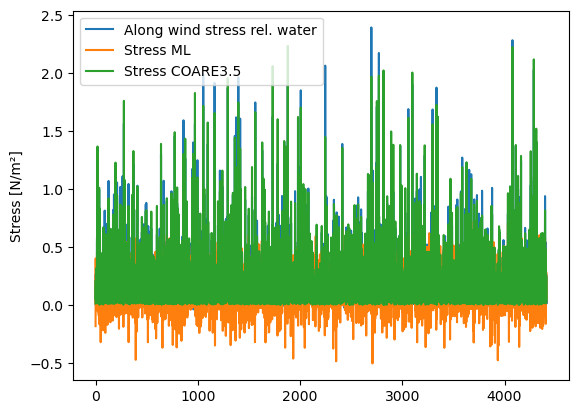

In [41]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

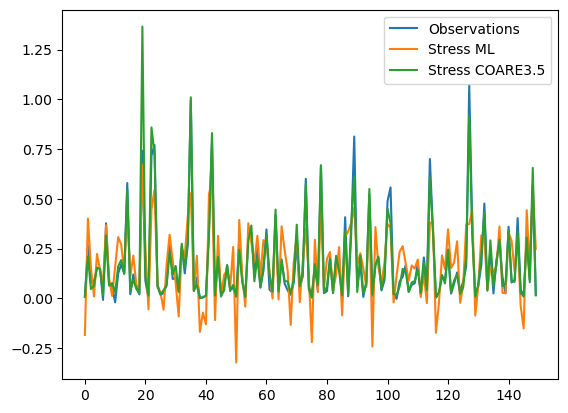

In [42]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [43]:
rmse(y_test.values, y_test_pred)

0.309967164328765

In [44]:
rmse(y_test.values, c_test)

0.05093964714982954

Text(0, 0.5, 'Stress ML [N/m²]')

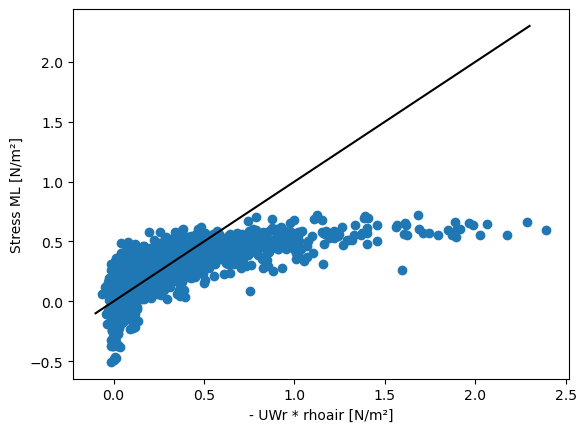

In [45]:
plt.scatter(y_test.values, y_test_pred)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

Text(0, 0.5, 'COARE [N/m²]')

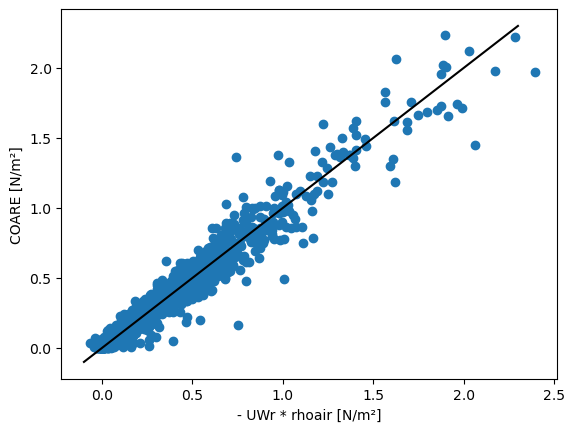

In [46]:
plt.scatter(y_test.values, c_test.values)
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('COARE [N/m²]') 

## Correlation

In [47]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.71215963],
       [0.71215963, 1.        ]])

In [48]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

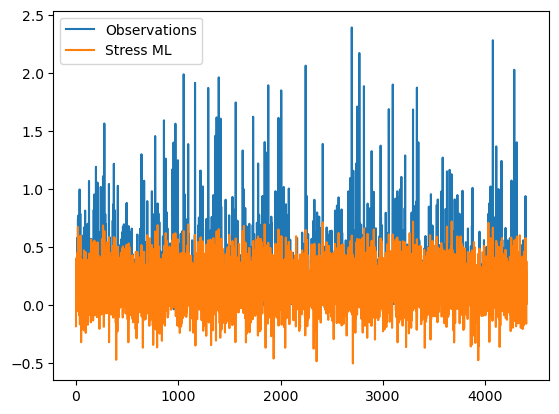

In [49]:
plt.plot(y_test.values[y_test_pred[:, 0] < 1], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 1], label='Stress ML')
plt.legend()

In [50]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1, 0])

array([[1.        , 0.71215963],
       [0.71215963, 1.        ]])

In [51]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 1], c_test.values[y_test_pred[:, 0] < 1])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [52]:
rmse(y_test.values[y_test_pred[:, 0] < 1], y_test_pred[y_test_pred[:, 0] < 1])

0.309967164328765

# Other experiments

In [53]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [54]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [55]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 5ms/step - loss: 2.4078 - mean_absolute_error: 1.1105 - val_loss: 0.8495 - val_mean_absolute_error: 0.7791
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8262 - mean_absolute_error: 0.6530 - val_loss: 0.5183 - val_mean_absolute_error: 0.5920
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.8451 - mean_absolute_error: 0.6480 - val_loss: 0.4474 - val_mean_absolute_error: 0.5305
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5588 - mean_absolute_error: 0.5504 - val_loss: 0.3940 - val_mean_absolute_error: 0.4732
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5295 - mean_absolute_error: 0.5173 - val_loss: 0.3051 - val_mean_absolute_error: 0.4146
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.4779 - mean_absolute_error: 0.4957 - val_loss: 0.3034 - val_mean_absolute_error: 0.4200
Epoch 7/500
25/25 [===

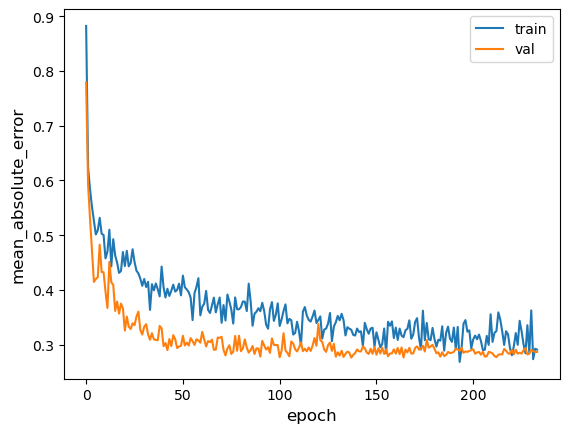

138/138 [==============================] - 0s 399us/step - loss: 0.3195 - mean_absolute_error: 0.3502
Test accuracy 0.35017362236976624
Test loss 0.3194774389266968


In [56]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [57]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

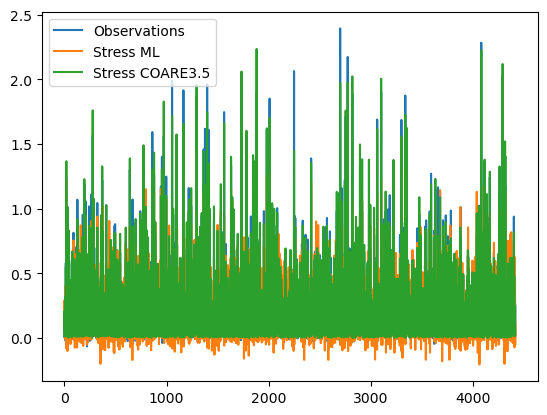

In [58]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [59]:
rmse(y_test.values, y_test_pred)

0.33133642460401347

In [60]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [61]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87061768],
       [0.87061768, 1.        ]])

In [62]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

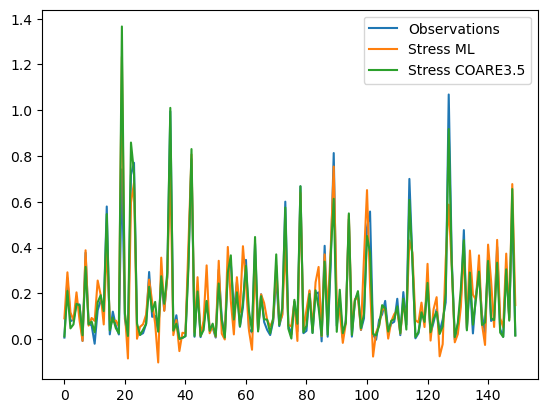

In [63]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [64]:
rmse(y_test.values, y_test_pred)

0.33133642460401347

## Correlation

In [65]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87061768],
       [0.87061768, 1.        ]])

In [66]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [67]:
y_test.values.shape

(4411,)

In [68]:
y_test_pred[:, 0].shape

(4411,)

In [69]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [70]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

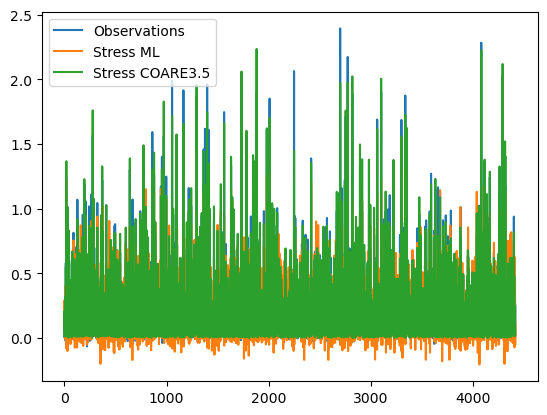

In [71]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

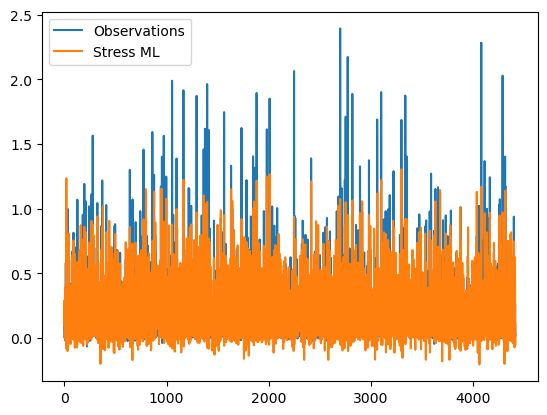

In [72]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [73]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [74]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.33133642460401347

Text(0, 0.5, 'Stress ML [N/m²]')

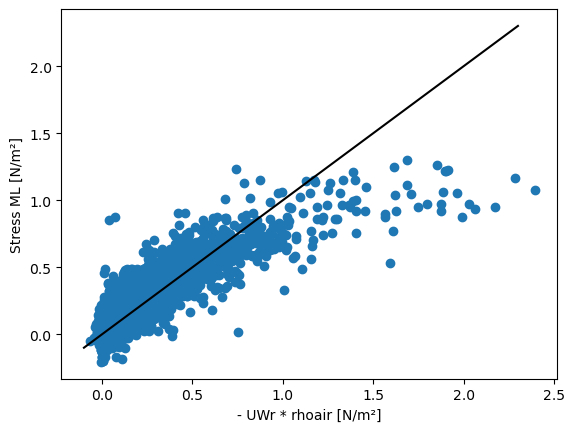

In [75]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [76]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [77]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [78]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 1s 6ms/step - loss: 2.1628 - mean_absolute_error: 1.0210 - val_loss: 0.8740 - val_mean_absolute_error: 0.7715
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6683 - mean_absolute_error: 0.5616 - val_loss: 0.6704 - val_mean_absolute_error: 0.6581
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6623 - mean_absolute_error: 0.5579 - val_loss: 0.4839 - val_mean_absolute_error: 0.5602
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5815 - mean_absolute_error: 0.5404 - val_loss: 0.4608 - val_mean_absolute_error: 0.5350
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6354 - mean_absolute_error: 0.5642 - val_loss: 0.3796 - val_mean_absolute_error: 0.4845
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.5360 - mean_absolute_error: 0.5019 - val_loss: 0.4246 - val_mean_absolute_error: 0.4858
Epoch 7/500
25/25 [===

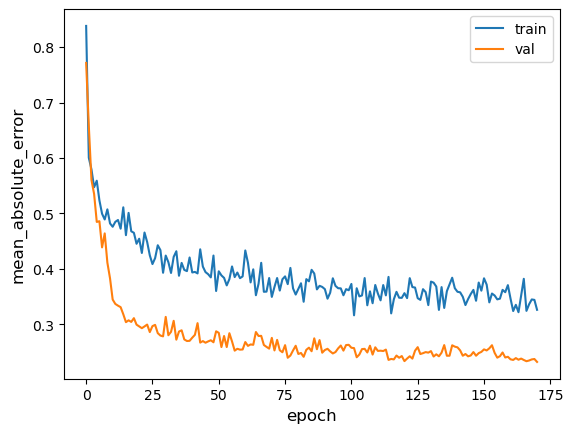

138/138 [==============================] - 0s 391us/step - loss: 0.2533 - mean_absolute_error: 0.2888
Test accuracy 0.2888425886631012
Test loss 0.2533420920372009


In [79]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [80]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

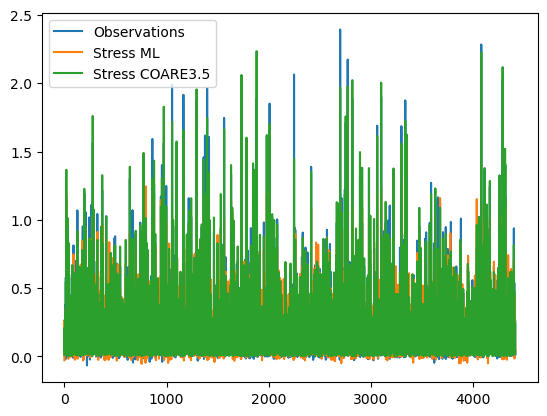

In [81]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [82]:
rmse(y_test.values, y_test_pred)

0.32260692247429723

In [83]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [84]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90372565],
       [0.90372565, 1.        ]])

In [85]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

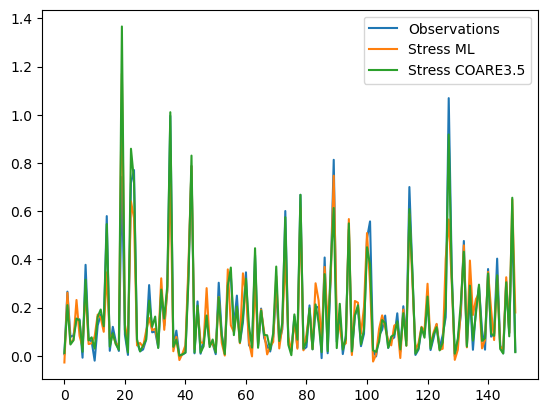

In [86]:
plt.plot(y_test.values[:150], label='Observations')
plt.plot(y_test_pred[:150], label='Stress ML')
plt.plot(c_test.values[:150], label='Stress COARE3.5')
plt.legend()

In [87]:
rmse(y_test.values, y_test_pred)

0.32260692247429723

## Correlation

In [88]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.90372565],
       [0.90372565, 1.        ]])

In [89]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [90]:
y_test.values.shape

(4411,)

In [91]:
y_test_pred[:, 0].shape

(4411,)

In [92]:
(y_test_pred > -2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [93]:
y_test.values[(y_test_pred[:, 0] > -2)]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

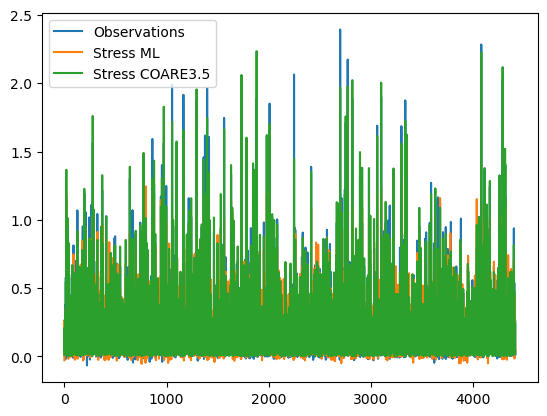

In [94]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] > -2], label='Stress COARE3.5')
plt.legend()

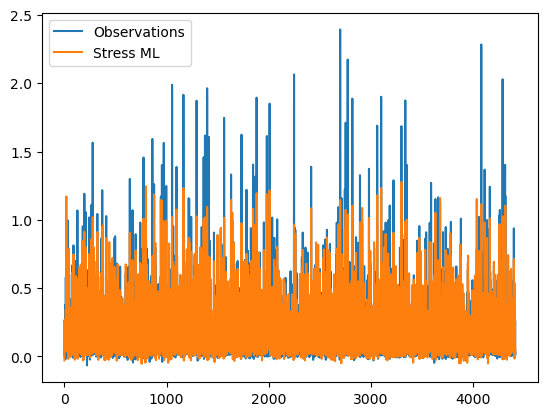

In [95]:
plt.plot(y_test.values[y_test_pred[:, 0] > -2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] > -2], label='Stress ML')
plt.legend()

In [96]:
np.corrcoef(y_test.values[y_test_pred[:, 0] > -2], c_test.values[y_test_pred[:, 0] > -2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [97]:
rmse(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])

0.32260692247429723

Text(0, 0.5, 'Stress ML [N/m²]')

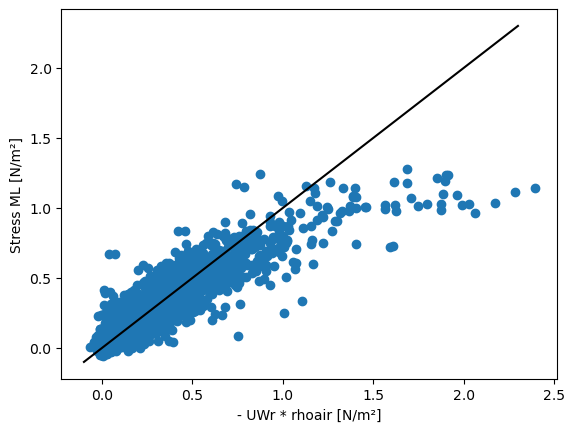

In [98]:
plt.scatter(y_test.values[y_test_pred[:, 0] > -2], y_test_pred[y_test_pred[:, 0] > -2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [99]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [100]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [101]:
multi_dense_model = tf.keras.Sequential([
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    #tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 1s 132ms/step - loss: 3.8717 - mean_absolute_error: 1.5591 - val_loss: 2.7412 - val_mean_absolute_error: 1.4026
Epoch 2/500
2/2 [==============================] - 0s 31ms/step - loss: 1.7440 - mean_absolute_error: 1.0357 - val_loss: 2.2241 - val_mean_absolute_error: 1.2611
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 1.1318 - mean_absolute_error: 0.8035 - val_loss: 1.9459 - val_mean_absolute_error: 1.1364
Epoch 4/500
2/2 [==============================] - 0s 30ms/step - loss: 0.9015 - mean_absolute_error: 0.7337 - val_loss: 1.6841 - val_mean_absolute_error: 1.0466
Epoch 5/500
2/2 [==============================] - 0s 29ms/step - loss: 0.6462 - mean_absolute_error: 0.6249 - val_loss: 1.4422 - val_mean_absolute_error: 0.9546
Epoch 6/500
2/2 [==============================] - 0s 29ms/step - loss: 0.5829 - mean_absolute_error: 0.6048 - val_loss: 1.2165 - val_mean_absolute_error: 0.8569
Epoch 7/500
2/2 [==========

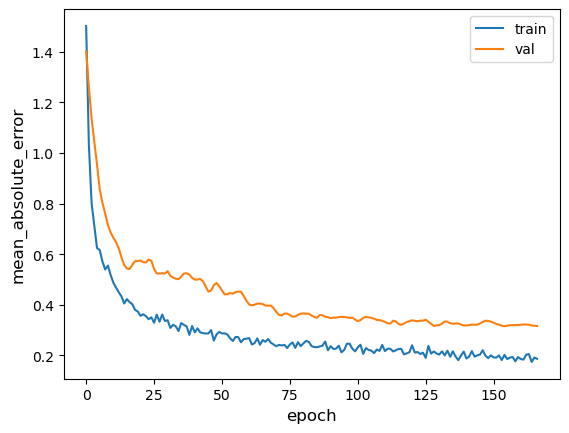

138/138 [==============================] - 0s 667us/step - loss: 0.3128 - mean_absolute_error: 0.3320
Test accuracy 0.33196157217025757
Test loss 0.3127695620059967


In [102]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [103]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

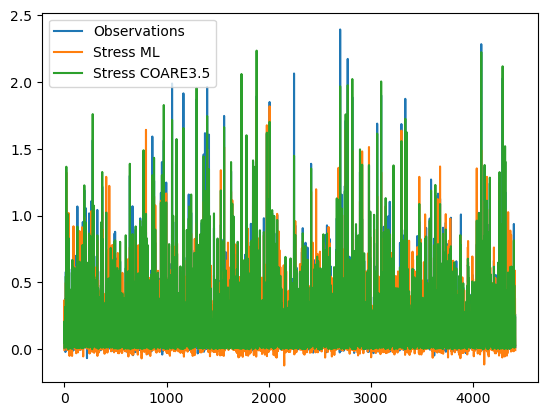

In [104]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [105]:
rmse(y_test.values, y_test_pred)

0.3371011694608058

In [106]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [107]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87380129],
       [0.87380129, 1.        ]])

In [108]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [109]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.87380129],
       [0.87380129, 1.        ]])

In [110]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [111]:
y_test.values.shape

(4411,)

In [112]:
y_test_pred[:, 0].shape

(4411,)

In [113]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [114]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

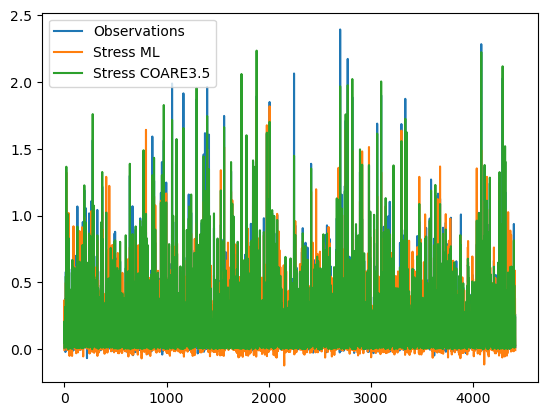

In [115]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

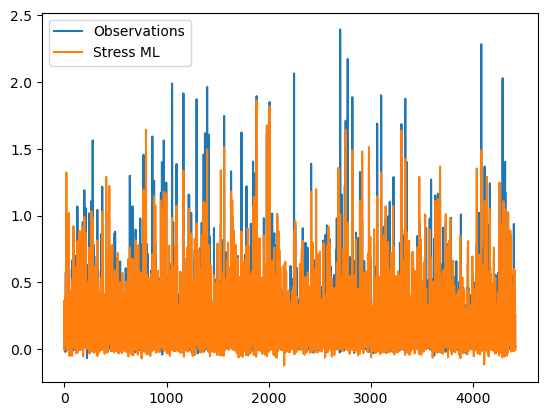

In [116]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [117]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [118]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3371011694608058

Text(0, 0.5, 'Stress ML [N/m²]')

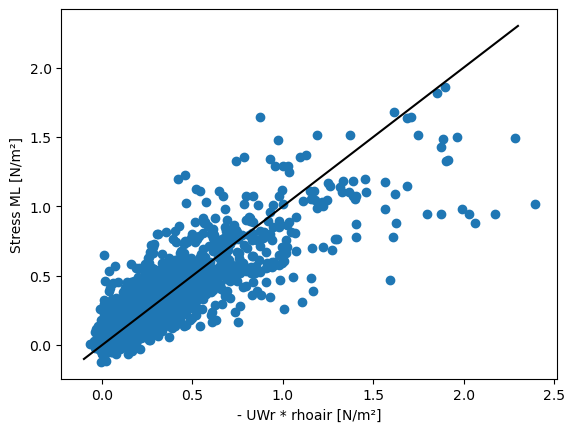

In [119]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

# CNN

For the CNN we neew to reshape s0, inc, and az vectors, to matrices of shape (num_records, 12, 10, num_variables).

In [76]:
list_num_pixels = list(range(num_pixels))

list_of_params_extended = [
        'sigma0_trip_fore', 'sigma0_trip_mid', 'sigma0_trip_aft',
        'azi_angle_trip_fore', 'azi_angle_trip_mid', 'azi_angle_trip_aft',
        'inc_angle_trip_fore', 'inc_angle_trip_mid', 'inc_angle_trip_aft',
        #'start_sensing_time','stop_sensing_time',
        #'lats_cropped_image', 'lons_cropped_image',
        'u10', 'v10'
    ]

dict_of_column_names = {}
new_columns = []
for param in list_of_params_extended:
    columns = [param + '_' + str(n) for n in list_num_pixels]
    dict_of_column_names[param] = columns
    new_columns = new_columns + columns
    
predictor_variables = new_columns

In [77]:
dict_param_arrays = {}
for param in list_of_params_extended:
    param_str = dict_of_column_names[param]
    dict_param_arrays[param] = ( df[param_str].values).reshape(df[param_str].shape[0], nx, ny)


In [78]:
x = np.stack([dict_param_arrays[x] for x in dict_param_arrays], 3)
x.shape

(4971, 7, 7, 11)

In [79]:
np.isnan(np.min(y))

False

In [80]:
x_train = x[:split_idx, :, :, :]
x_test = x[split_idx:, :, :, :]

In [81]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [82]:
x_train.shape

(560, 7, 7, 11)

In [83]:
# Compute average and std of the training data
x_train_mean = np.nanmean(x_train, axis=0)
x_train_std = np.nanstd(x_train, axis=0)

y_train_mean = np.nanmean(y_train, axis=0)
y_train_std = np.nanstd(y_train,axis=0)

# Normalize
x_train_norm = (x_train - x_train_mean) / x_train_std
x_test_norm = (x_test - x_train_mean) / x_train_std
y_train_norm = (y_train - y_train_mean) / y_train_std
y_test_norm = (y_test - y_train_mean) / y_train_std

In [84]:
y_train_mean

0.16487292220305189

In [85]:
x_train_mean.shape

(7, 7, 11)

In [86]:
x_train_norm.shape

(560, 7, 7, 11)

In [87]:
y_train_norm.shape

(560,)

In [88]:
x_test_norm.shape

(4411, 7, 7, 11)

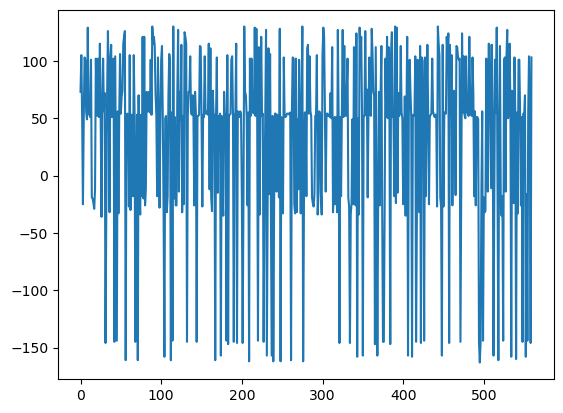

In [89]:
plt.plot(x_train[:, 6, 0, 3])

# Other experiments

In [333]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [334]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [335]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 40ms/step - loss: 2.3504 - mean_absolute_error: 1.1534 - val_loss: 2.6930 - val_mean_absolute_error: 1.4208
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 2.3339 - mean_absolute_error: 1.1043 - val_loss: 2.3478 - val_mean_absolute_error: 1.3305
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 1.5653 - mean_absolute_error: 0.9327 - val_loss: 2.0705 - val_mean_absolute_error: 1.2490
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.2633 - mean_absolute_error: 0.8563 - val_loss: 1.8129 - val_mean_absolute_error: 1.1653
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 1.2354 - mean_absolute_error: 0.7827 - val_loss: 1.5903 - val_mean_absolute_error: 1.0874
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1961 - mean_absolute_error: 0.8030 - val_loss: 1.4309 - val_mean_absolute_error: 1.0322
Epoch 7/500
4/4 [===========

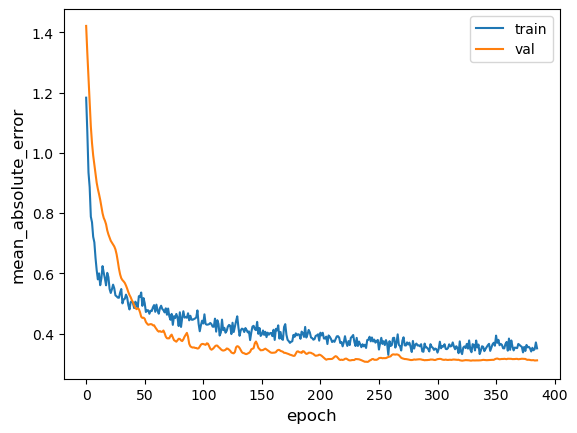

138/138 [==============================] - 0s 542us/step - loss: 0.3787 - mean_absolute_error: 0.3608
Test accuracy 0.3607836365699768
Test loss 0.37867245078086853


In [336]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [337]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

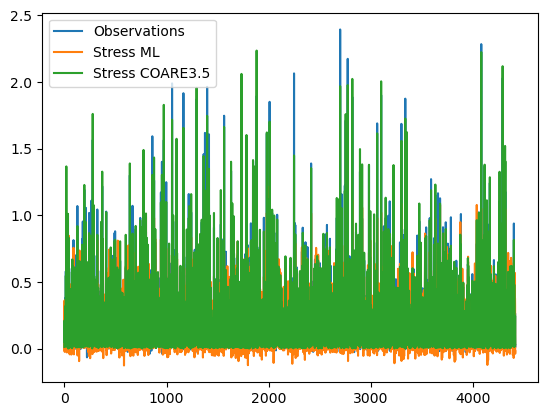

In [338]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [339]:
rmse(y_test.values, y_test_pred)

0.3164829237136809

In [340]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [341]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84791713],
       [0.84791713, 1.        ]])

In [342]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [343]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.84791713],
       [0.84791713, 1.        ]])

In [344]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [345]:
y_test.values.shape

(4411,)

In [346]:
y_test_pred[:, 0].shape

(4411,)

In [347]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [348]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

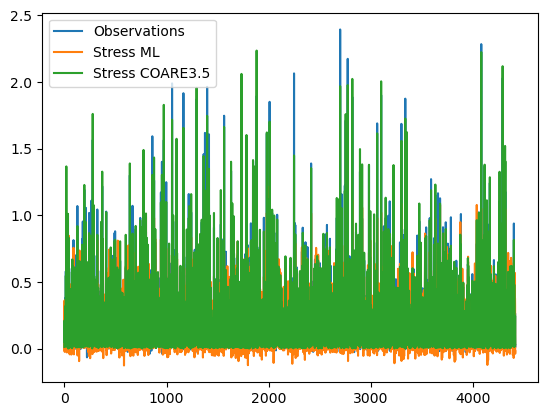

In [349]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

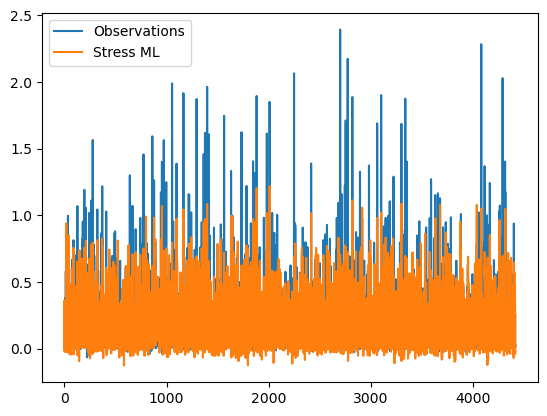

In [350]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [351]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [352]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3164829237136809

Text(0, 0.5, 'Stress ML [N/m²]')

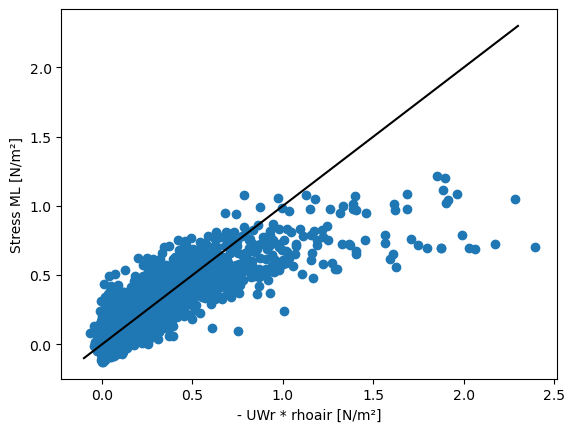

In [353]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [354]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [355]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [356]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 1.5703 - mean_absolute_error: 0.9469 - val_loss: 0.7202 - val_mean_absolute_error: 0.5883
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7848 - mean_absolute_error: 0.6300 - val_loss: 0.7206 - val_mean_absolute_error: 0.6137
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8508 - mean_absolute_error: 0.6221 - val_loss: 0.5102 - val_mean_absolute_error: 0.5122
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5218 - mean_absolute_error: 0.5279 - val_loss: 0.3756 - val_mean_absolute_error: 0.4624
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5479 - mean_absolute_error: 0.5400 - val_loss: 0.3371 - val_mean_absolute_error: 0.4395
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5038 - mean_absolute_error: 0.5447 - val_loss: 0.3536 - val_mean_absolute_error: 0.4440
Epoch 7/500
25/25 [===

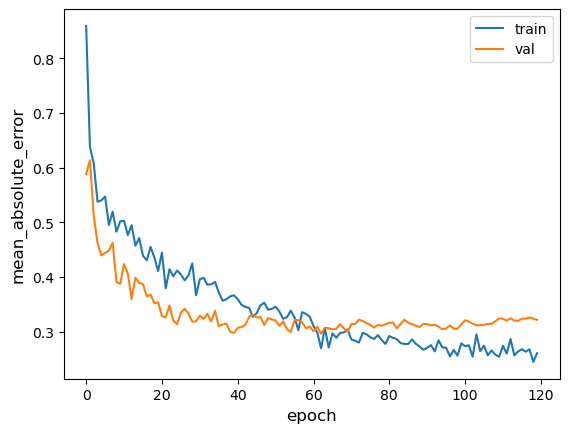

138/138 [==============================] - 0s 549us/step - loss: 0.3264 - mean_absolute_error: 0.3491
Test accuracy 0.34910768270492554
Test loss 0.3263810873031616


In [357]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [358]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

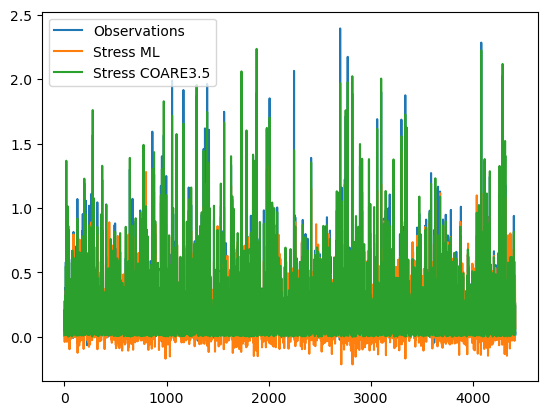

In [359]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [360]:
rmse(y_test.values, y_test_pred)

0.3274482123893402

In [361]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [362]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86769688],
       [0.86769688, 1.        ]])

In [363]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [364]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86769688],
       [0.86769688, 1.        ]])

In [365]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [366]:
y_test.values.shape

(4411,)

In [367]:
y_test_pred[:, 0].shape

(4411,)

In [368]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [369]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

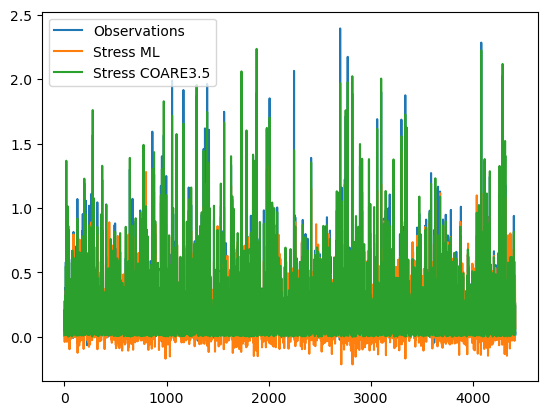

In [370]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

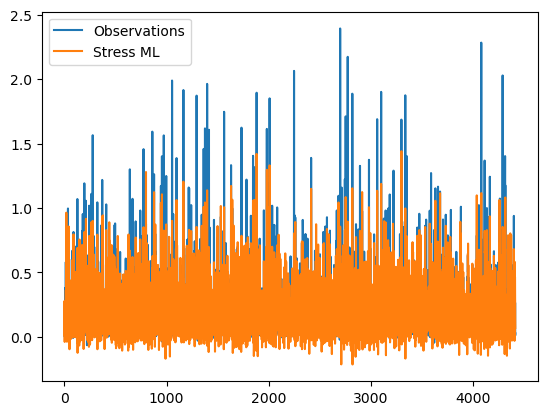

In [371]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [372]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [373]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3274482123893402

Text(0, 0.5, 'Stress ML [N/m²]')

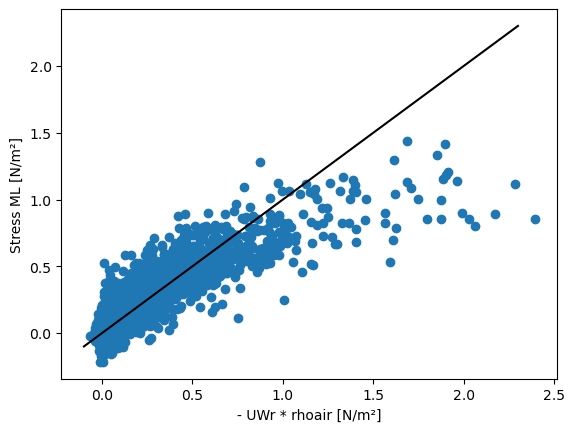

In [374]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [375]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [376]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [377]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 2.6384 - mean_absolute_error: 1.2290 - val_loss: 1.3398 - val_mean_absolute_error: 0.8036
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.5023 - mean_absolute_error: 0.8519 - val_loss: 1.0447 - val_mean_absolute_error: 0.7104
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8086 - mean_absolute_error: 0.6237 - val_loss: 0.7942 - val_mean_absolute_error: 0.6326
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7593 - mean_absolute_error: 0.6392 - val_loss: 0.6396 - val_mean_absolute_error: 0.5423
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.5239 - mean_absolute_error: 0.5468 - val_loss: 0.4977 - val_mean_absolute_error: 0.4886
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6007 - mean_absolute_error: 0.5754 - val_loss: 0.4278 - val_mean_absolute_error: 0.4546
Epoch 7/500
25/25 [===

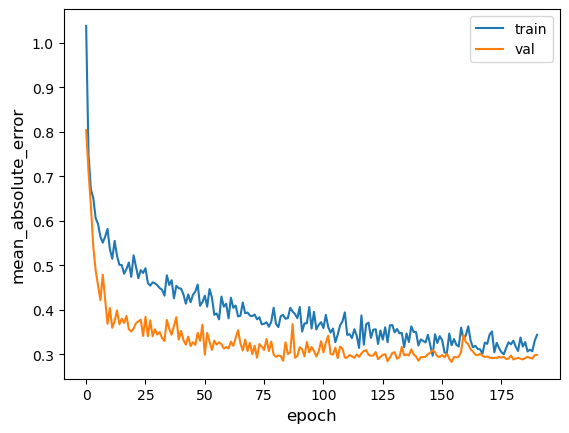

138/138 [==============================] - 0s 550us/step - loss: 0.3245 - mean_absolute_error: 0.3413
Test accuracy 0.3413459062576294
Test loss 0.32450106739997864


In [378]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [379]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

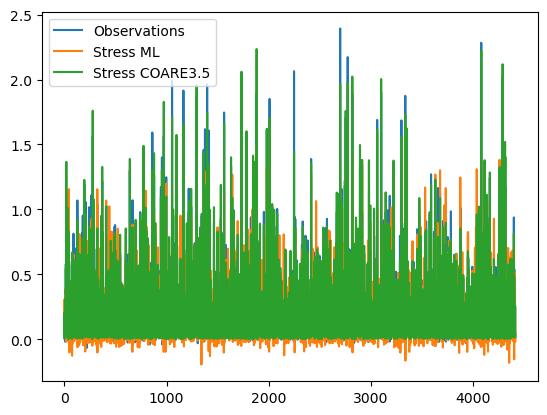

In [380]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [381]:
rmse(y_test.values, y_test_pred)

0.3326511842279177

In [382]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [383]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86816893],
       [0.86816893, 1.        ]])

In [384]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [385]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86816893],
       [0.86816893, 1.        ]])

In [386]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [387]:
y_test.values.shape

(4411,)

In [388]:
y_test_pred[:, 0].shape

(4411,)

In [389]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [390]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

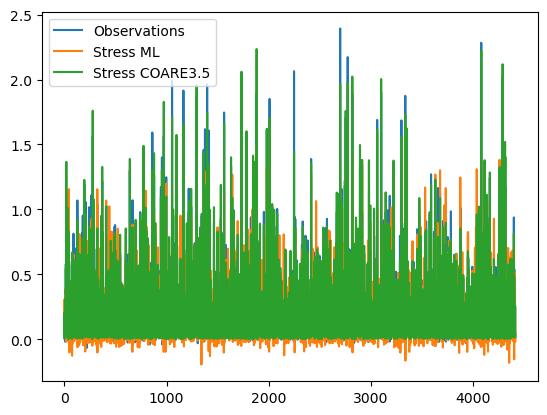

In [391]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

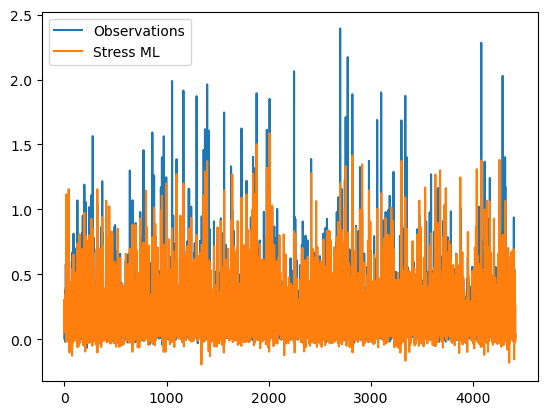

In [392]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [393]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [394]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.3326511842279177

Text(0, 0.5, 'Stress ML [N/m²]')

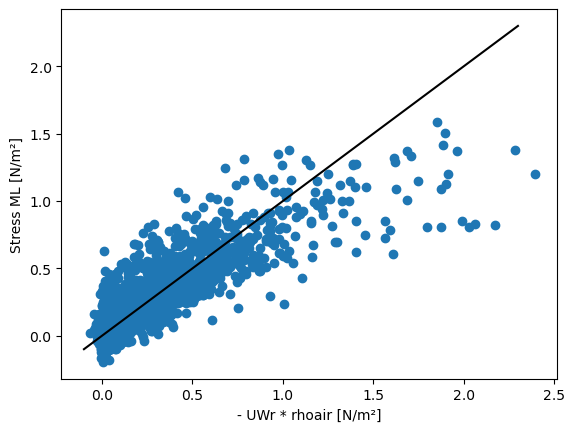

In [395]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [396]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [397]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [398]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(4,4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 2.2079 - mean_absolute_error: 1.1232 - val_loss: 0.8388 - val_mean_absolute_error: 0.6342
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8690 - mean_absolute_error: 0.6744 - val_loss: 0.6521 - val_mean_absolute_error: 0.5633
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7032 - mean_absolute_error: 0.6418 - val_loss: 0.4644 - val_mean_absolute_error: 0.4818
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7328 - mean_absolute_error: 0.6106 - val_loss: 0.4248 - val_mean_absolute_error: 0.4614
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6885 - mean_absolute_error: 0.6176 - val_loss: 0.4160 - val_mean_absolute_error: 0.4326
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7018 - mean_absolute_error: 0.6124 - val_loss: 0.3161 - val_mean_absolute_error: 0.4148
Epoch 7/500
25/25 [===

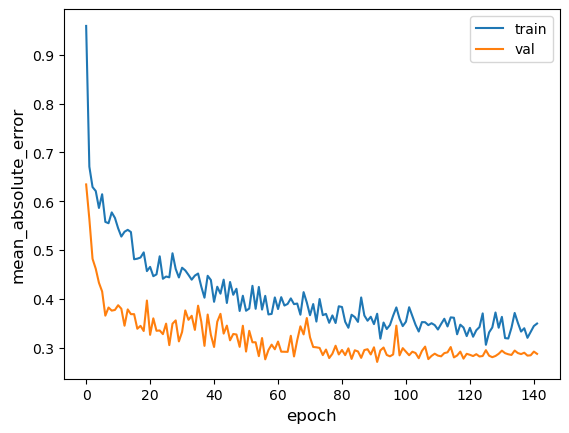

138/138 [==============================] - 0s 557us/step - loss: 0.3554 - mean_absolute_error: 0.3430
Test accuracy 0.3430284559726715
Test loss 0.3553810119628906


In [399]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [400]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

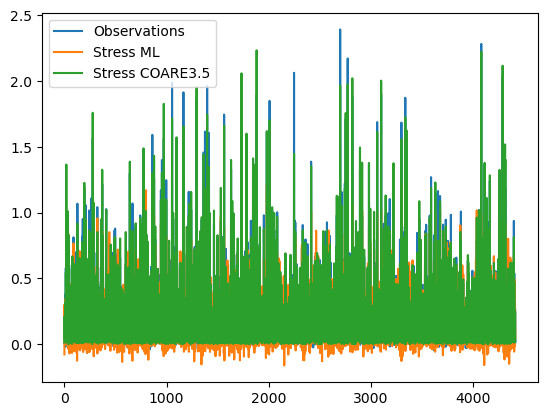

In [401]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [402]:
rmse(y_test.values, y_test_pred)

0.31732147112809717

In [403]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [404]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85895077],
       [0.85895077, 1.        ]])

In [405]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [406]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85895077],
       [0.85895077, 1.        ]])

In [407]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [408]:
y_test.values.shape

(4411,)

In [409]:
y_test_pred[:, 0].shape

(4411,)

In [410]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [411]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

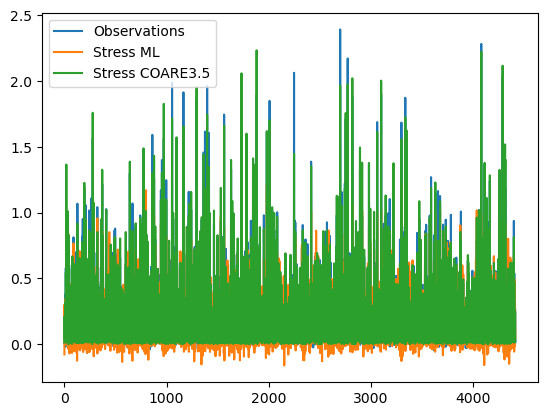

In [412]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

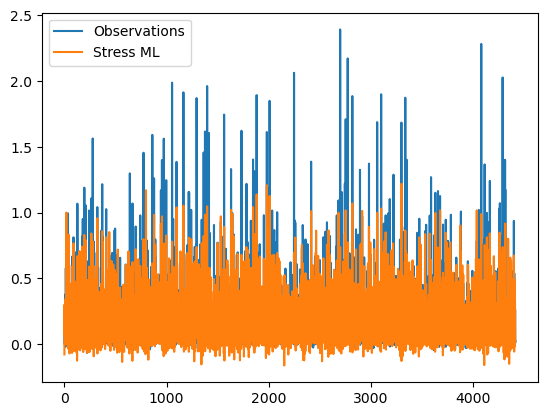

In [413]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [414]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [415]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.31732147112809717

Text(0, 0.5, 'Stress ML [N/m²]')

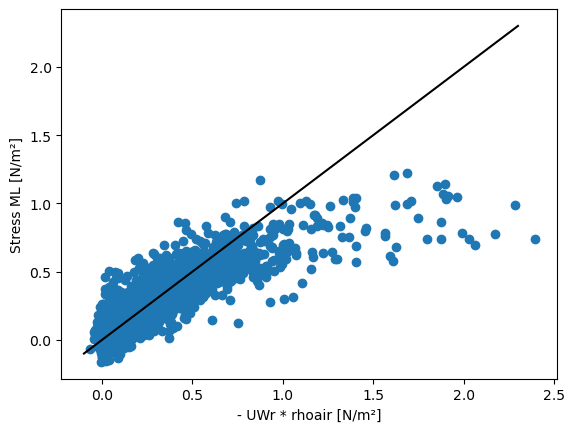

In [416]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [417]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [418]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [419]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7,11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 2.3336 - mean_absolute_error: 1.1565 - val_loss: 0.9771 - val_mean_absolute_error: 0.8406
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.2164 - mean_absolute_error: 0.8120 - val_loss: 0.6944 - val_mean_absolute_error: 0.6845
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9521 - mean_absolute_error: 0.7075 - val_loss: 0.4924 - val_mean_absolute_error: 0.5500
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7940 - mean_absolute_error: 0.6452 - val_loss: 0.4183 - val_mean_absolute_error: 0.4996
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7556 - mean_absolute_error: 0.6680 - val_loss: 0.3930 - val_mean_absolute_error: 0.4737
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7862 - mean_absolute_error: 0.6178 - val_loss: 0.3248 - val_mean_absolute_error: 0.4238
Epoch 7/500
25/25 [===

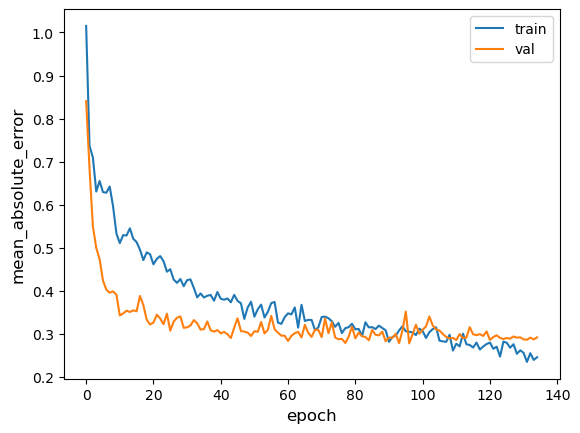

138/138 [==============================] - 0s 541us/step - loss: 0.2784 - mean_absolute_error: 0.3082
Test accuracy 0.3082181215286255
Test loss 0.27844834327697754


In [420]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [421]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

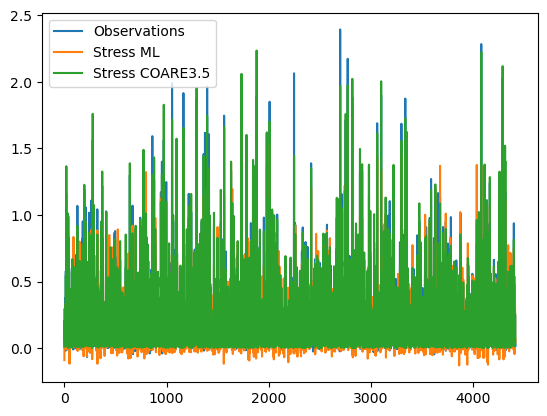

In [422]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [423]:
rmse(y_test.values, y_test_pred)

0.32503843402851446

In [424]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [425]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89032922],
       [0.89032922, 1.        ]])

In [426]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [427]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.89032922],
       [0.89032922, 1.        ]])

In [428]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [429]:
y_test.values.shape

(4411,)

In [430]:
y_test_pred[:, 0].shape

(4411,)

In [431]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [432]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

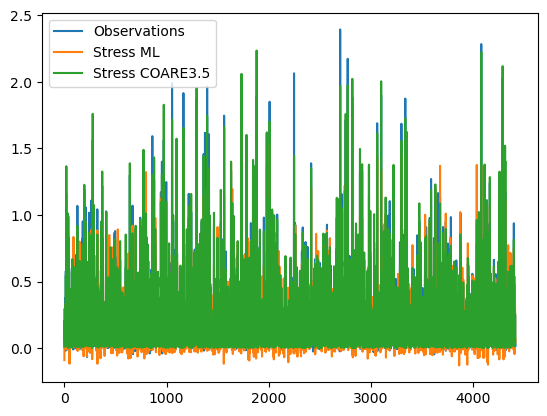

In [433]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

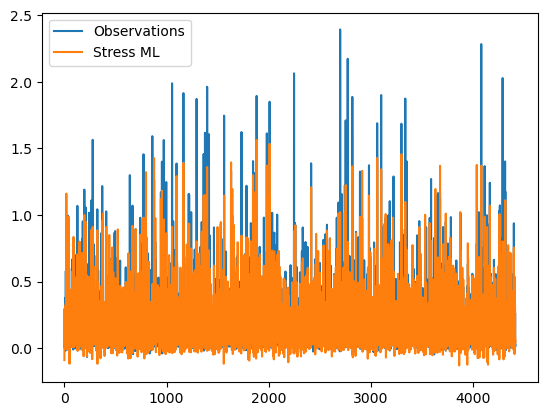

In [434]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [435]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [436]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.32503843402851446

Text(0, 0.5, 'Stress ML [N/m²]')

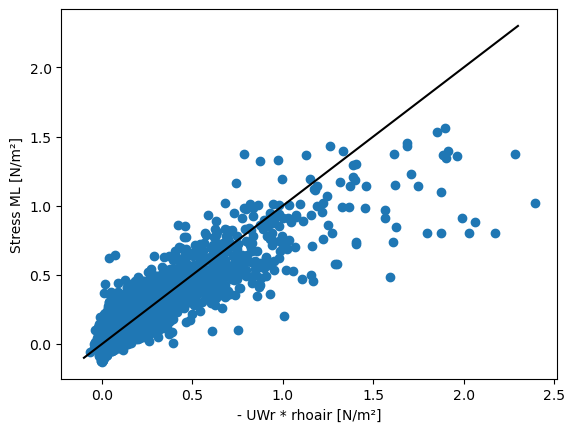

In [437]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [438]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [439]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [441]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 6ms/step - loss: 2.2892 - mean_absolute_error: 1.1352 - val_loss: 0.8840 - val_mean_absolute_error: 0.7357
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.0140 - mean_absolute_error: 0.7545 - val_loss: 0.6506 - val_mean_absolute_error: 0.6242
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8600 - mean_absolute_error: 0.6681 - val_loss: 0.6275 - val_mean_absolute_error: 0.5941
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9172 - mean_absolute_error: 0.7167 - val_loss: 0.5438 - val_mean_absolute_error: 0.5503
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8480 - mean_absolute_error: 0.6592 - val_loss: 0.4779 - val_mean_absolute_error: 0.5049
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7846 - mean_absolute_error: 0.6450 - val_loss: 0.4339 - val_mean_absolute_error: 0.4757
Epoch 7/500
25/25 [===

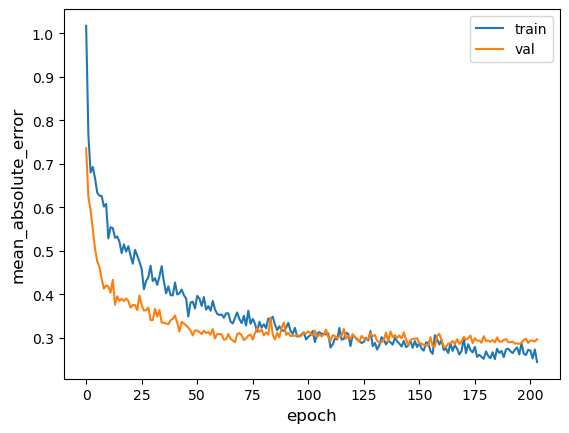

138/138 [==============================] - 0s 537us/step - loss: 1933.3314 - mean_absolute_error: 41.8076
Test accuracy 41.80763244628906
Test loss 1933.3314208984375


In [442]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [443]:
y_test_pred = multi_dense_model.predict(x_test)

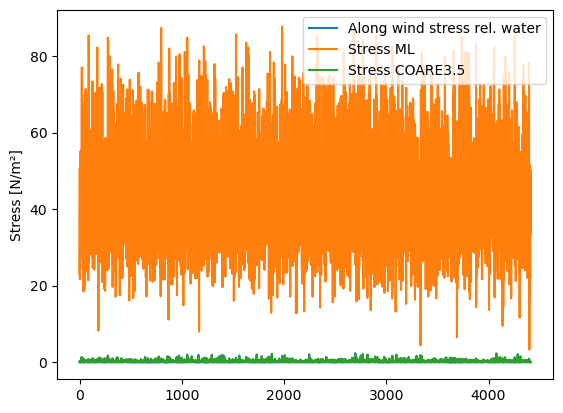

In [444]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [445]:
rmse(y_test.values, y_test_pred)

43.9887828889628

In [446]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [447]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.24527045],
       [0.24527045, 1.        ]])

In [448]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [449]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [450]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [451]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 1.7708 - mean_absolute_error: 0.9650 - val_loss: 0.7903 - val_mean_absolute_error: 0.7181
Epoch 2/500
25/25 [==============================] - 0s 4ms/step - loss: 1.0099 - mean_absolute_error: 0.7902 - val_loss: 0.5449 - val_mean_absolute_error: 0.5930
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8201 - mean_absolute_error: 0.6580 - val_loss: 0.7225 - val_mean_absolute_error: 0.6647
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.7543 - mean_absolute_error: 0.6544 - val_loss: 0.5978 - val_mean_absolute_error: 0.6232
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9123 - mean_absolute_error: 0.7112 - val_loss: 0.4535 - val_mean_absolute_error: 0.5098
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6671 - mean_absolute_error: 0.6399 - val_loss: 0.4059 - val_mean_absolute_error: 0.4948
Epoch 7/500
25/25 [===

In [452]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [453]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [454]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 0s 7ms/step - loss: 2.2296 - mean_absolute_error: 1.1004 - val_loss: 0.6352 - val_mean_absolute_error: 0.5253
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9433 - mean_absolute_error: 0.7317 - val_loss: 0.5538 - val_mean_absolute_error: 0.5292
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 1.0705 - mean_absolute_error: 0.7832 - val_loss: 0.3871 - val_mean_absolute_error: 0.4350
Epoch 4/500
25/25 [==============================] - 0s 3ms/step - loss: 0.9249 - mean_absolute_error: 0.7225 - val_loss: 0.3416 - val_mean_absolute_error: 0.4188
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6650 - mean_absolute_error: 0.6118 - val_loss: 0.2684 - val_mean_absolute_error: 0.3822
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6143 - mean_absolute_error: 0.5832 - val_loss: 0.2407 - val_mean_absolute_error: 0.3377
Epoch 7/500
25/25 [===

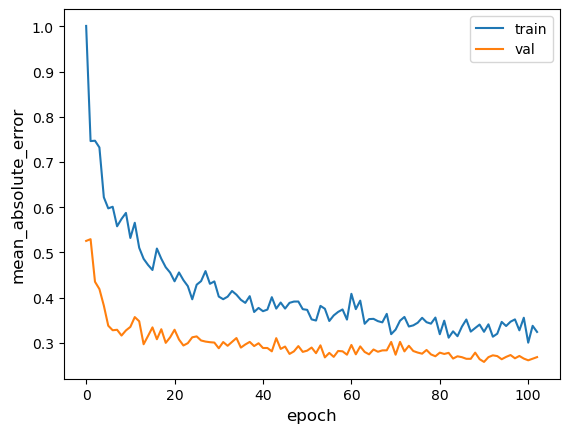

138/138 [==============================] - 0s 684us/step - loss: 0.2756 - mean_absolute_error: 0.3008
Test accuracy 0.3007754683494568
Test loss 0.2756257951259613


In [455]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [456]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

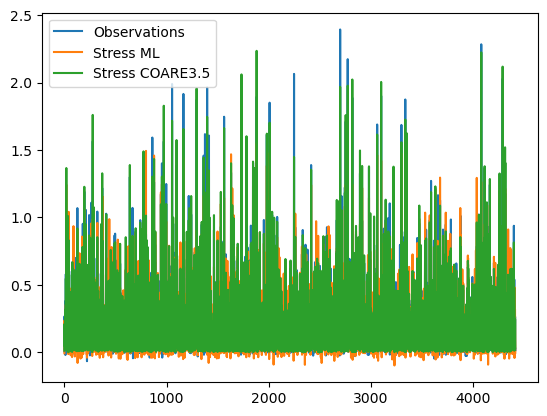

In [457]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [458]:
rmse(y_test.values, y_test_pred)

0.33220369998176835

In [459]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [460]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88980981],
       [0.88980981, 1.        ]])

In [461]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [462]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.88980981],
       [0.88980981, 1.        ]])

In [463]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [464]:
y_test.values.shape

(4411,)

In [465]:
y_test_pred[:, 0].shape

(4411,)

In [466]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [467]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

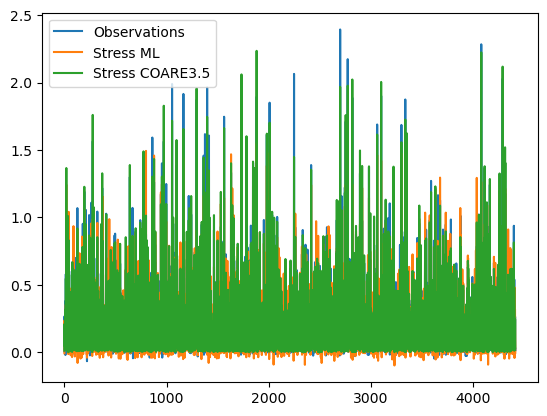

In [468]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

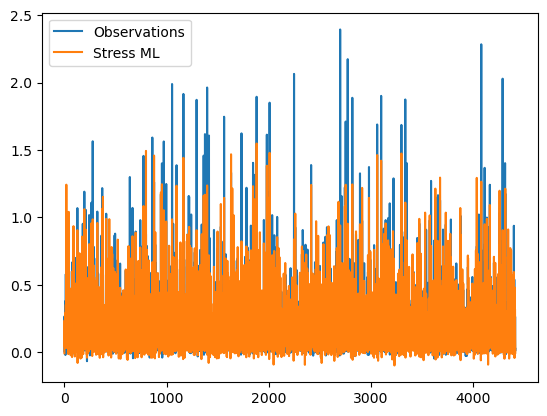

In [469]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [470]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [471]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.33220369998176835

Text(0, 0.5, 'Stress ML [N/m²]')

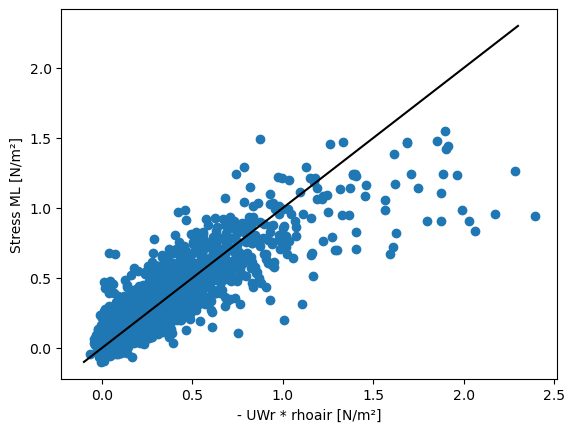

In [472]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [473]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [474]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [475]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_43/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](Placeholder)' with input shapes: [?,1,1,32].

In [ ]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [ ]:
y_test_pred = multi_dense_model.predict(x_test)

In [ ]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [ ]:
rmse(y_test.values, y_test_pred)

In [ ]:
rmse(y_test.values, c_test.values)

In [ ]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

In [ ]:
np.corrcoef(y_test.values, c_test.values)

In [476]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [477]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [478]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 38ms/step - loss: 4.5521 - mean_absolute_error: 1.6434 - val_loss: 0.8693 - val_mean_absolute_error: 0.6305
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 1.7756 - mean_absolute_error: 1.0373 - val_loss: 0.7436 - val_mean_absolute_error: 0.6385
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 1.7808 - mean_absolute_error: 1.0550 - val_loss: 0.5938 - val_mean_absolute_error: 0.5675
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.5451 - mean_absolute_error: 0.9750 - val_loss: 0.5068 - val_mean_absolute_error: 0.5019
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0757 - mean_absolute_error: 0.7984 - val_loss: 0.5331 - val_mean_absolute_error: 0.4979
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9330 - mean_absolute_error: 0.7149 - val_loss: 0.6009 - val_mean_absolute_error: 0.5326
Epoch 7/500
4/4 [===========

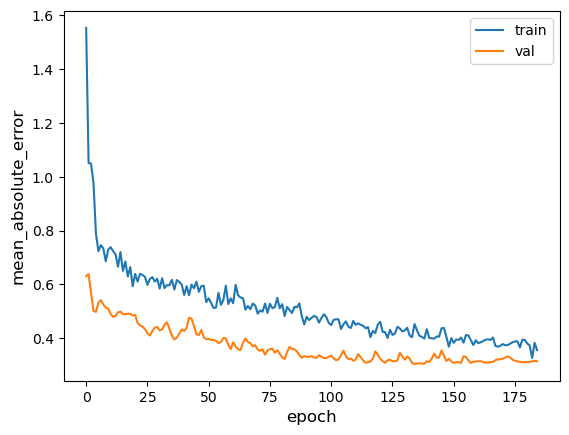

138/138 [==============================] - 0s 594us/step - loss: 508.5449 - mean_absolute_error: 21.2350
Test accuracy 21.23496437072754
Test loss 508.5448913574219


In [479]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [480]:
y_test_pred = multi_dense_model.predict(x_test)

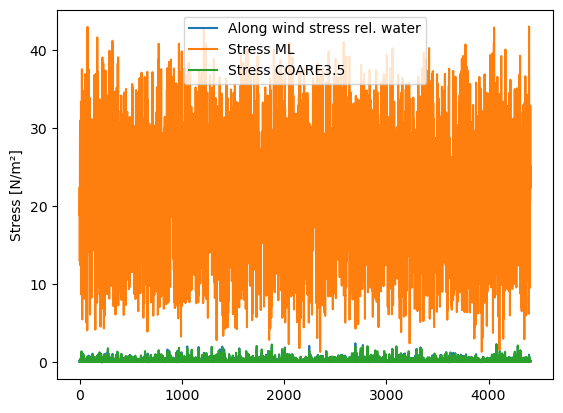

In [481]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [482]:
rmse(y_test.values, y_test_pred)

22.57186192621499

In [483]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [484]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.       , 0.2463088],
       [0.2463088, 1.       ]])

In [485]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [488]:
OUT_STEPS = 1
num_features = 1
batch_size =128
epochs=500

metric = 'mean_absolute_error'

In [489]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

Variables do not exist


In [490]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(2,2), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
4/4 [==============================] - 0s 36ms/step - loss: 3.0681 - mean_absolute_error: 1.3326 - val_loss: 1.9137 - val_mean_absolute_error: 1.2144
Epoch 2/500
4/4 [==============================] - 0s 10ms/step - loss: 2.0018 - mean_absolute_error: 1.0650 - val_loss: 1.5092 - val_mean_absolute_error: 1.0880
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 1.4208 - mean_absolute_error: 0.8829 - val_loss: 1.2532 - val_mean_absolute_error: 0.9839
Epoch 4/500
4/4 [==============================] - 0s 10ms/step - loss: 1.0845 - mean_absolute_error: 0.7749 - val_loss: 1.0926 - val_mean_absolute_error: 0.9071
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9686 - mean_absolute_error: 0.7284 - val_loss: 0.9969 - val_mean_absolute_error: 0.8516
Epoch 6/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9149 - mean_absolute_error: 0.7219 - val_loss: 0.9374 - val_mean_absolute_error: 0.8172
Epoch 7/500
4/4 [===========

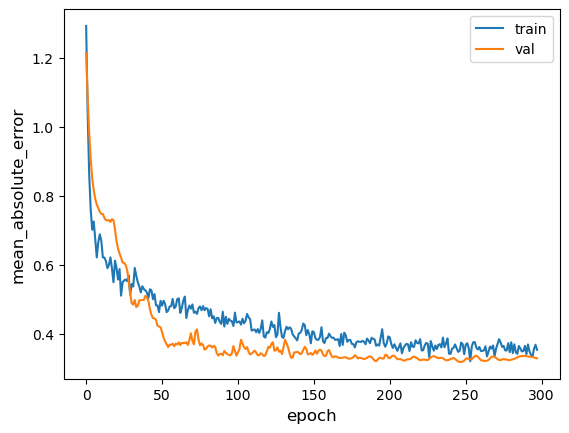

138/138 [==============================] - 0s 573us/step - loss: 0.3663 - mean_absolute_error: 0.3635
Test accuracy 0.36345380544662476
Test loss 0.3662751615047455


In [491]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [492]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

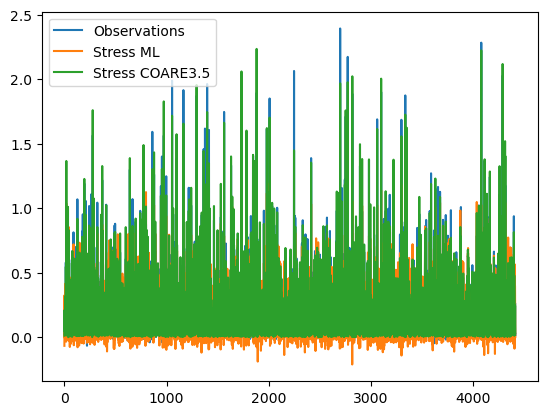

In [493]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [494]:
rmse(y_test.values, y_test_pred)

0.32113798821007966

In [495]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [496]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85110159],
       [0.85110159, 1.        ]])

In [497]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [498]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.85110159],
       [0.85110159, 1.        ]])

In [499]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [500]:
y_test.values.shape

(4411,)

In [501]:
y_test_pred[:, 0].shape

(4411,)

In [502]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [503]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

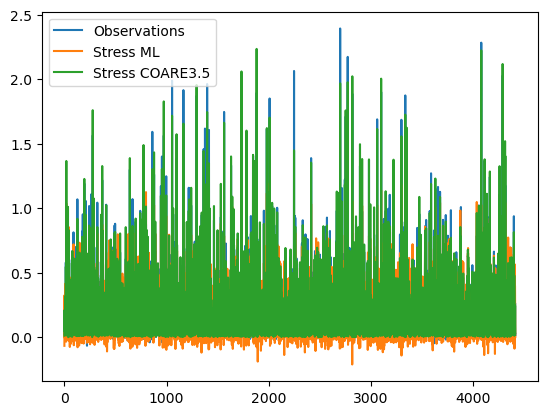

In [504]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

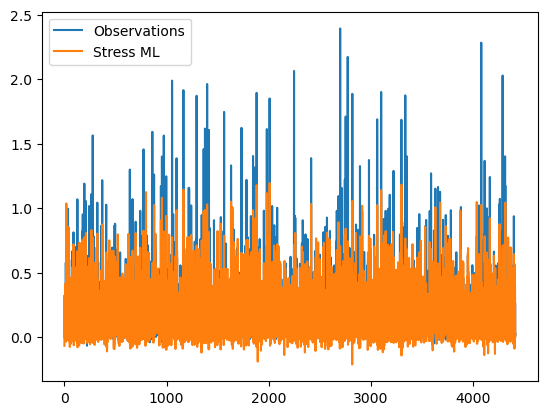

In [505]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [506]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [507]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.32113798821007966

Text(0, 0.5, 'Stress ML [N/m²]')

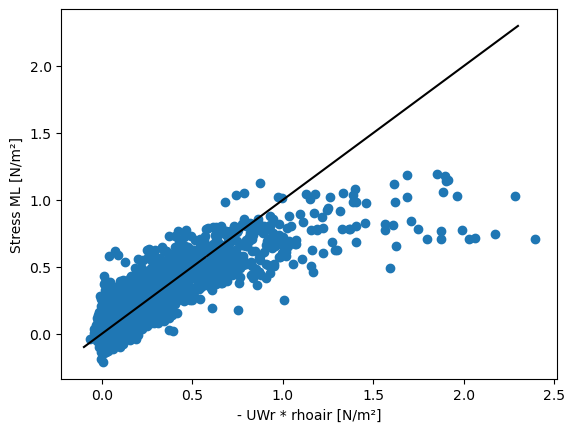

In [508]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 

In [509]:
OUT_STEPS = 1
num_features = 1
batch_size =256
epochs=500

metric = 'mean_absolute_error'

In [510]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [511]:
multi_dense_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), padding='same', activation='relu', input_shape=(7, 7, 11)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train_norm,
    y_train_norm,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
2/2 [==============================] - 0s 106ms/step - loss: 2.8439 - mean_absolute_error: 1.3333 - val_loss: 0.7842 - val_mean_absolute_error: 0.5424
Epoch 2/500
2/2 [==============================] - 0s 28ms/step - loss: 1.5586 - mean_absolute_error: 0.9507 - val_loss: 0.7226 - val_mean_absolute_error: 0.5148
Epoch 3/500
2/2 [==============================] - 0s 27ms/step - loss: 1.4722 - mean_absolute_error: 0.9344 - val_loss: 0.6479 - val_mean_absolute_error: 0.4666
Epoch 4/500
2/2 [==============================] - 0s 26ms/step - loss: 1.0864 - mean_absolute_error: 0.7888 - val_loss: 0.6343 - val_mean_absolute_error: 0.4777
Epoch 5/500
2/2 [==============================] - 0s 27ms/step - loss: 0.9585 - mean_absolute_error: 0.7452 - val_loss: 0.6318 - val_mean_absolute_error: 0.4986
Epoch 6/500
2/2 [==============================] - 0s 25ms/step - loss: 0.8928 - mean_absolute_error: 0.7036 - val_loss: 0.6117 - val_mean_absolute_error: 0.4888
Epoch 7/500
2/2 [==========

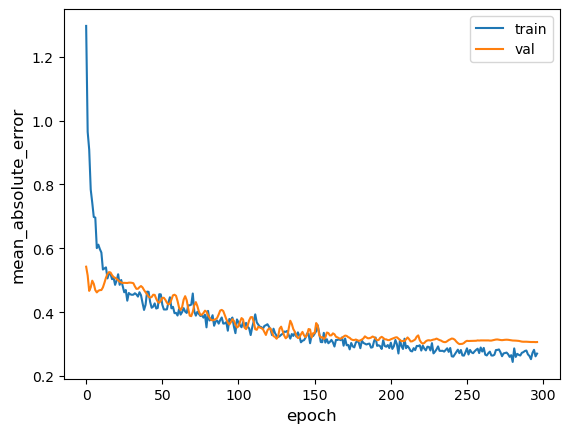

138/138 [==============================] - 0s 730us/step - loss: 0.3283 - mean_absolute_error: 0.3436
Test accuracy 0.3435967266559601
Test loss 0.32825541496276855


In [512]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test_norm, y_test_norm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [513]:
y_test_norm_pred = multi_dense_model.predict(x_test_norm)
y_test_pred = (y_test_norm_pred * y_train_std) + y_train_mean

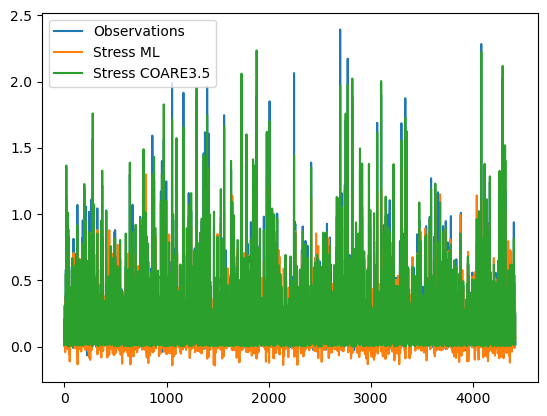

In [514]:
plt.plot(y_test.values, label='Observations')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.legend()

In [515]:
rmse(y_test.values, y_test_pred)

0.32267606274522814

In [516]:
rmse(y_test.values, c_test.values)

0.05093964714982954

In [517]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86893704],
       [0.86893704, 1.        ]])

In [518]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

## Correlation

In [519]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[1.        , 0.86893704],
       [0.86893704, 1.        ]])

In [520]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [521]:
y_test.values.shape

(4411,)

In [522]:
y_test_pred[:, 0].shape

(4411,)

In [523]:
(y_test_pred < 2)

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [524]:
y_test.values[(y_test_pred[:, 0] < 2 )]

array([0.00647341, 0.26591951, 0.07810497, ..., 0.26375354, 0.00899667,
       0.02543989])

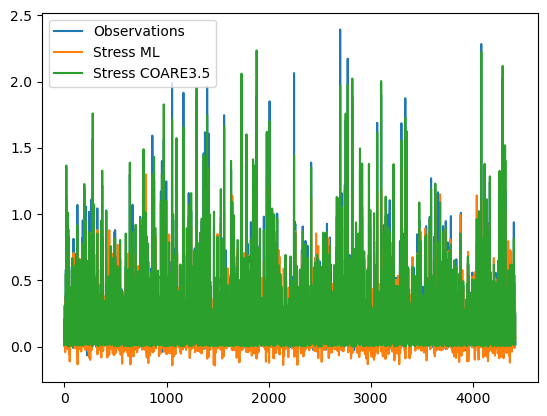

In [525]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.plot(c_test.values[y_test_pred[:, 0] < 2], label='Stress COARE3.5')
plt.legend()

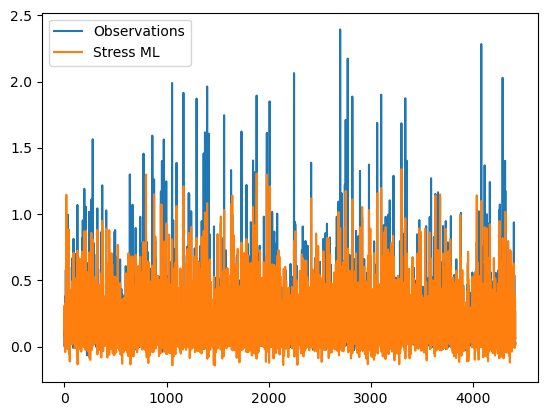

In [526]:
plt.plot(y_test.values[y_test_pred[:, 0] < 2], label='Observations')
plt.plot(y_test_pred[y_test_pred[:, 0] < 2], label='Stress ML')
plt.legend()

In [527]:
np.corrcoef(y_test.values[y_test_pred[:, 0] < 2], c_test.values[y_test_pred[:, 0] < 2])

array([[1.        , 0.97921755],
       [0.97921755, 1.        ]])

In [528]:
rmse(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])

0.32267606274522814

Text(0, 0.5, 'Stress ML [N/m²]')

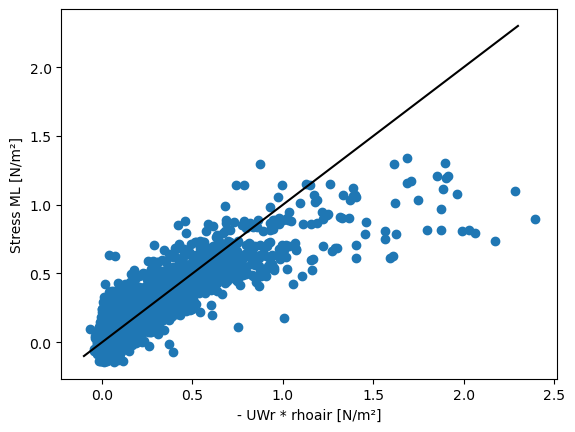

In [529]:
plt.scatter(y_test.values[y_test_pred[:, 0] < 2], y_test_pred[y_test_pred[:, 0] < 2])
plt.plot([-0.1, 2.3], [-0.1, 2.3], color='k')
plt.xlabel('- UWr * rhoair [N/m²]') 
plt.ylabel('Stress ML [N/m²]') 